<a href="https://colab.research.google.com/github/cacalos121-collab/Proyectos-/blob/main/arbolde_decision_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
sleep_Disorder = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
sleep_Disorder['Occupation'] = sleep_Disorder['Occupation'].replace({'Software Engineer':1, 'Doctor':2, 'Sales Representative':3, 'Teacher':4,
       'Nurse':5, 'Engineer':6, 'Accountant':7, 'Scientist':8, 'Lawyer':9,
       'Salesperson':10, 'Manager':11})

/tmp/ipython-input-3759385839.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sleep_Disorder['Occupation'] = sleep_Disorder['Occupation'].replace({'Software Engineer':1, 'Doctor':2, 'Sales Representative':3, 'Teacher':4,


In [ ]:
sleep_Disorder['BMI Category'] = sleep_Disorder['BMI Category'].replace({'Overweight':1, 'Normal':2, 'Obese':3, 'Normal Weight':4})

/tmp/ipython-input-3061442788.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sleep_Disorder['BMI Category'] = sleep_Disorder['BMI Category'].replace({'Overweight':1, 'Normal':2, 'Obese':3, 'Normal Weight':4})


In [ ]:
sleep_Disorder['Gender'] = sleep_Disorder['Gender'].replace({'Male':1, "Female": 2})

/tmp/ipython-input-3506797507.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sleep_Disorder['Gender'] = sleep_Disorder['Gender'].replace({'Male':1, "Female": 2})


In [ ]:
# Split 'Blood Pressure' into two columns
sleep_Disorder[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = sleep_Disorder['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric
sleep_Disorder['Systolic Blood Pressure'] = pd.to_numeric(sleep_Disorder['Systolic Blood Pressure'])
sleep_Disorder['Diastolic Blood Pressure'] = pd.to_numeric(sleep_Disorder['Diastolic Blood Pressure'])

KeyError: 'Blood Pressure'

In [ ]:
sleep_Disorder

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,1,27,1,6.1,6,42,6,1,77,4200,NaN,126,83
1,2,1,28,2,6.2,6,60,8,2,75,10000,NaN,125,80
2,3,1,28,2,6.2,6,60,8,2,75,10000,NaN,125,80
3,4,1,28,3,5.9,4,30,8,3,85,3000,Sleep Apnea,140,90
4,5,1,28,3,5.9,4,30,8,3,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,2,59,5,8.1,9,75,3,1,68,7000,Sleep Apnea,140,95
370,371,2,59,5,8.0,9,75,3,1,68,7000,Sleep Apnea,140,95
371,372,2,59,5,8.1,9,75,3,1,68,7000,Sleep Apnea,140,95
372,373,2,59,5,8.1,9,75,3,1,68,7000,Sleep Apnea,140,95


In [ ]:
sleep_Disorder.fillna({"Sleep Disorder": "No"}, inplace=True)

In [ ]:

# Escalado de características
X = sleep_Disorder.drop('Sleep Disorder', axis=1)
y = sleep_Disorder['Sleep Disorder']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Algoritmo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Validación cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'Precisión promedio con validación cruzada: {np.mean(cv_scores):.2f}')

# Predicciones y métricas de clasificación
y_pred = model.predict(X_test)
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))



Precisión promedio con validación cruzada: 0.49

Matriz de confusión:
[[13  2  1]
 [ 0 43  0]
 [ 4  1 11]]

Informe de clasificación:
              precision    recall  f1-score   support

    Insomnia       0.76      0.81      0.79        16
          No       0.93      1.00      0.97        43
 Sleep Apnea       0.92      0.69      0.79        16

    accuracy                           0.89        75
   macro avg       0.87      0.83      0.85        75
weighted avg       0.89      0.89      0.89        75



In [ ]:
feature_names = X.columns
feature_names

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure'],
      dtype='object')

In [ ]:
y

,Sleep Disorder
0,No
1,No
2,No
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


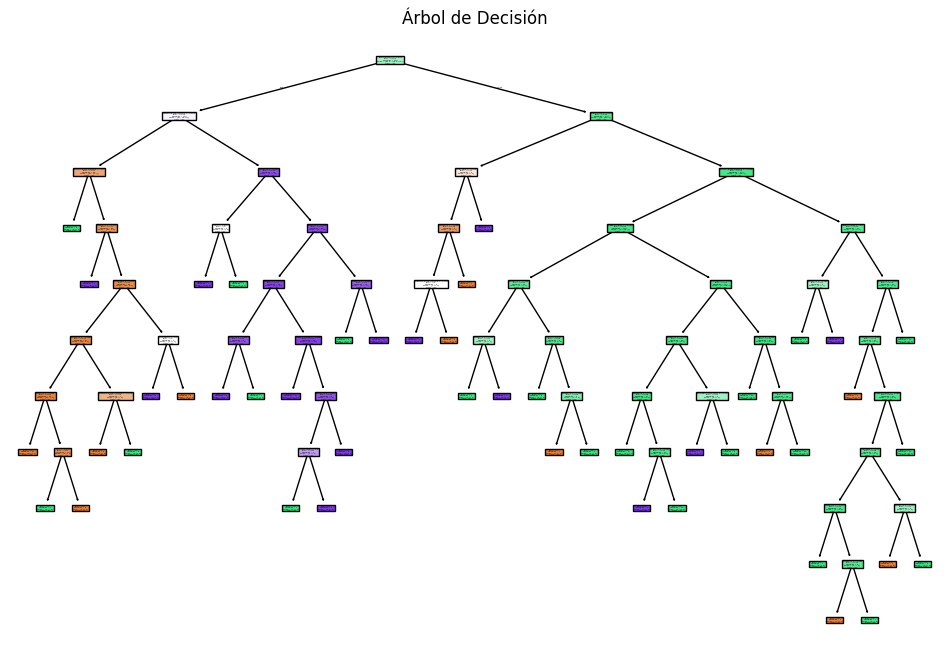

In [ ]:
# Visualización del árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names, class_names= y, filled=True)
plt.title('Árbol de Decisión')
plt.show()